In [387]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "AB_NYC_2019.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dgomonov/new-york-city-airbnb-open-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3443068261.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
First 5 records:      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nig

Possible Predictions

Price Prediction 💲

Predict the price of a listing based on location, room type, availability, etc.

Example: “What would be the expected nightly price for a private room in Harlem with 10 reviews?”

Demand/Popularity Prediction 📈

Predict number_of_reviews or reviews_per_month to estimate demand.

Example: “Which listings are likely to get more bookings?”

Availability Prediction 📅

Predict if a listing will be available for most of the year (high availability_365).

Room Type Classification 🏠

Predict whether a place is an entire home, private room, or shared room based on price, location, and reviews.

Host Behavior Prediction 👩‍💼

Predict whether a host is likely to have multiple listings (professional host vs. casual host).

#BASIC EDA

In [388]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [389]:
new_data=df.drop(['id','name'],axis=1)

In [390]:
new_data.head(4)

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19               0.21                               6   
1  2019-05-21               0.38                               2   
2         NaN                NaN                               1   
3  2019-07-05               4.64                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194

In [391]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

In [392]:
new_data.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [393]:
new_data.isna().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last review , host name and reviews per month have null values

In [394]:
new_data['host_name'].unique()


array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [395]:
new_data[new_data['host_id']==415290]

host_id host_name neighbourhood_group    neighbourhood  latitude  \
27777   415290       NaN           Manhattan  Upper East Side  40.76436   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
27777  -73.96836  Entire home/apt    325               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
27777         NaN                NaN                               1   

       availability_365  
27777                 0

Host names are missing

In [396]:
new_data['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
11274802       1
76487242       1
76477851       1
76453466       1
3156684        1
Name: count, Length: 37457, dtype: int64

/tmp/ipython-input-3296410234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(new_data['host_id'].value_counts().iloc[:5],palette='flare')


<Axes: xlabel='host_id', ylabel='count'>

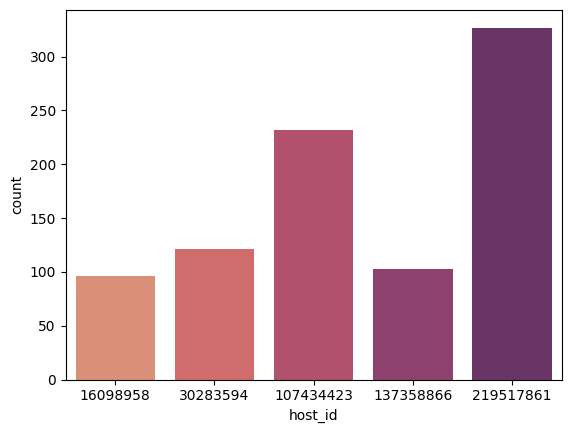

In [397]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.barplot(new_data['host_id'].value_counts().iloc[:5],palette='flare')

In [398]:
new_data['host_id'].value_counts().iloc[:5]

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: count, dtype: int64

one host has more than  300 transcation

<Axes: xlabel='count', ylabel='neighbourhood_group'>

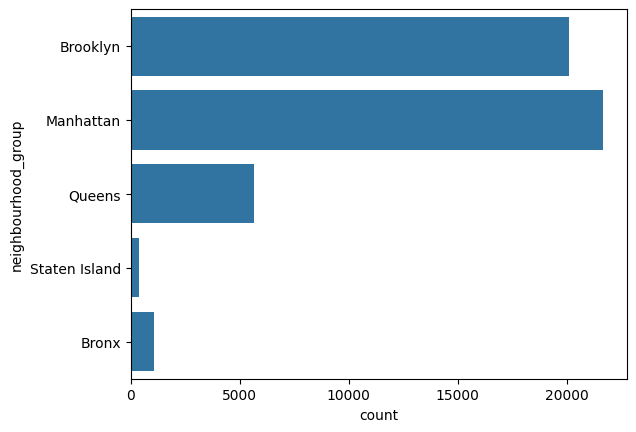

In [399]:


sns.countplot(new_data['neighbourhood_group'])

In [400]:
new_data['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

<Axes: ylabel='count'>

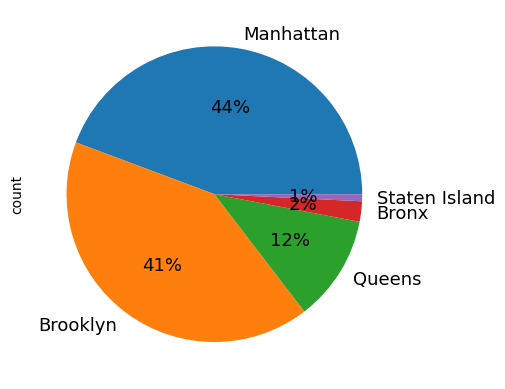

In [401]:
new_data['neighbourhood_group'].value_counts().plot(kind='pie',autopct="%1.0f%%",fontsize=13)

Manhattan has highest number of transcation 21661




Brooklyn has the second highest transcation of listing 20104

<Axes: xlabel='longitude', ylabel='latitude'>

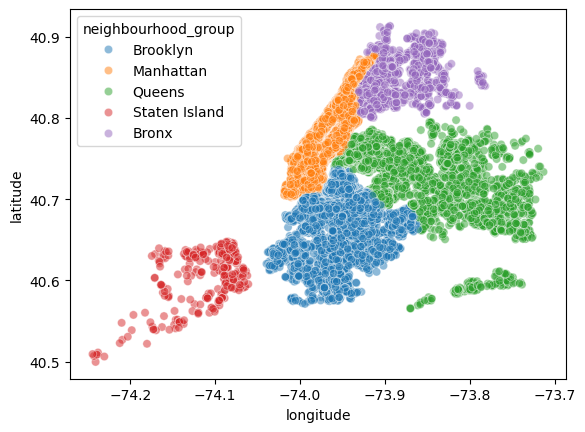

In [402]:
sns.scatterplot(y='latitude',x="longitude",data=new_data,hue='neighbourhood_group',alpha=0.5)

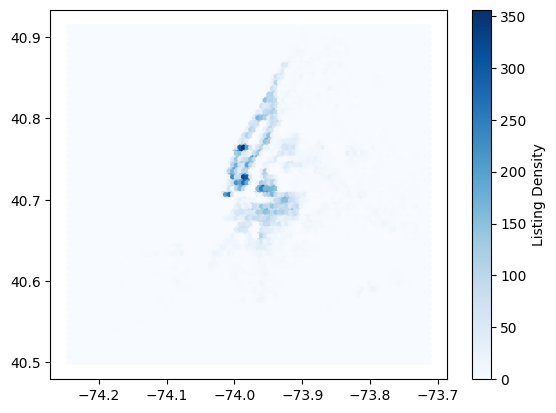

In [403]:
plt.hexbin(new_data['longitude'], new_data['latitude'], gridsize=100, cmap='Blues')
plt.colorbar(label='Listing Density')


Brooklyn and Manhattan have most dense region based on transcation




<Axes: xlabel='count', ylabel='room_type'>

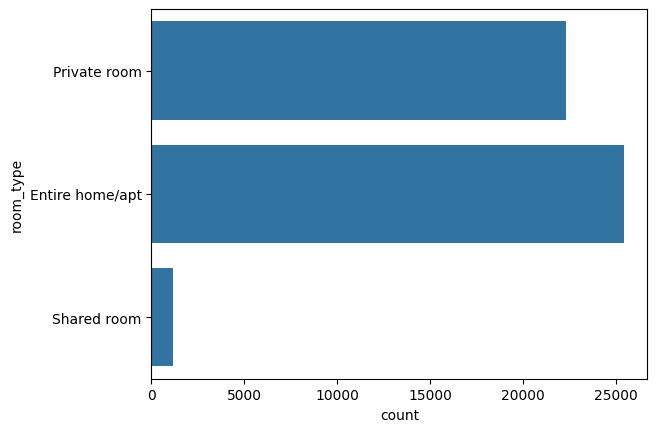

In [404]:
sns.countplot(new_data['room_type'])

In [405]:
new_data['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

<Axes: ylabel='count'>

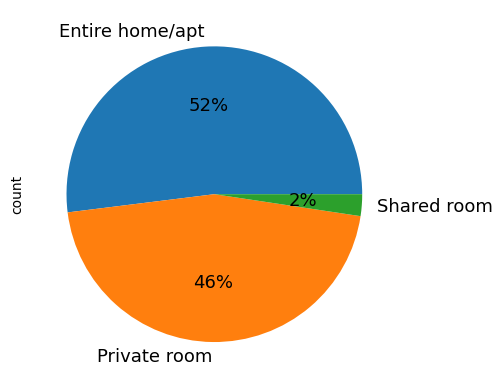

In [406]:
new_data['room_type'].value_counts().plot(kind='pie',autopct="%1.0f%%",fontsize=13)

Entire home / apt transcation around 2509

Private room transcation around 22326




In [407]:
new_data.head()

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19               0.21                               6   
1  2019-05-21               0.38                               2   
2         NaN                NaN                               1   
3  2019-07-05               4.64                               1   
4  2018-11-19               0.10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

#outlier detection

<Axes: ylabel='price'>

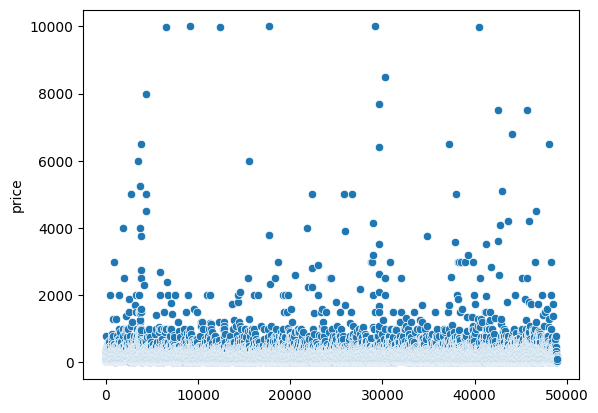

In [408]:
sns.scatterplot(new_data['price'])

<Axes: xlabel='price', ylabel='Density'>

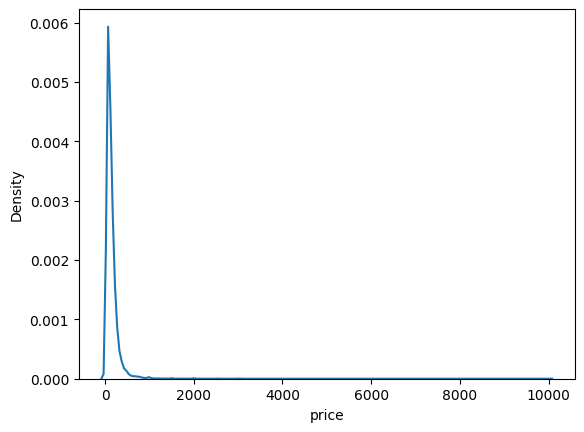

In [409]:
sns.kdeplot(new_data['price'])

price has so many outliers and most data concentrated around center

<Axes: xlabel='minimum_nights', ylabel='Density'>

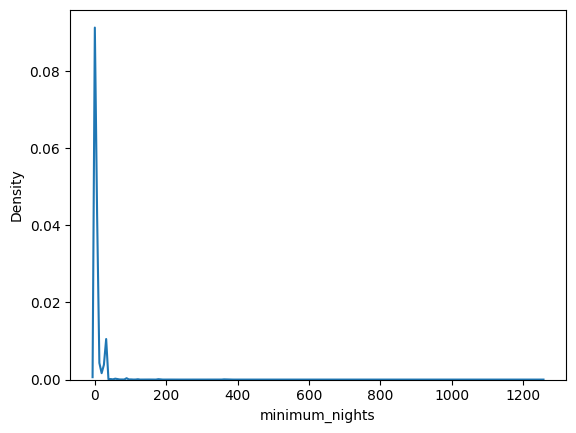

In [410]:
sns.kdeplot(new_data['minimum_nights'])

<Axes: ylabel='minimum_nights'>

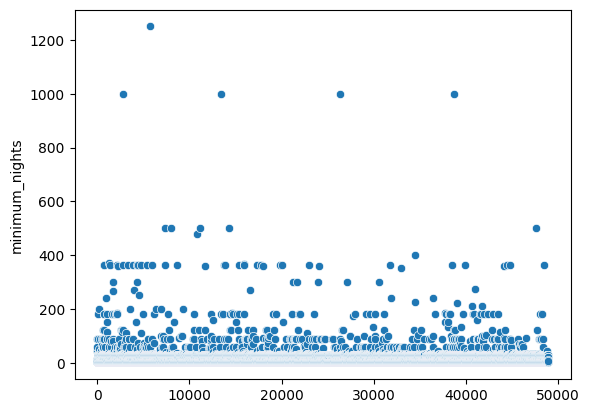

In [411]:
sns.scatterplot(new_data['minimum_nights'])

minimum night has outliers

<Axes: ylabel='number_of_reviews'>

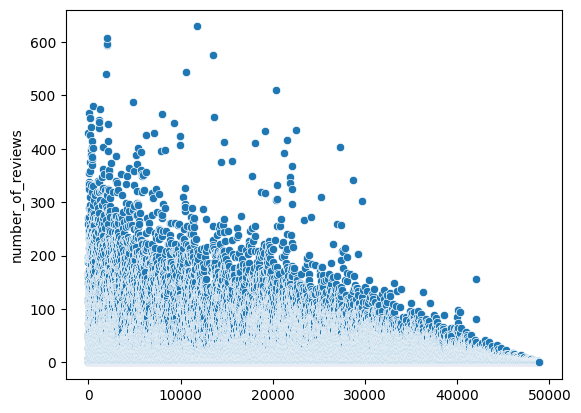

In [412]:
sns.scatterplot(new_data['number_of_reviews'])

<Axes: xlabel='number_of_reviews', ylabel='Density'>

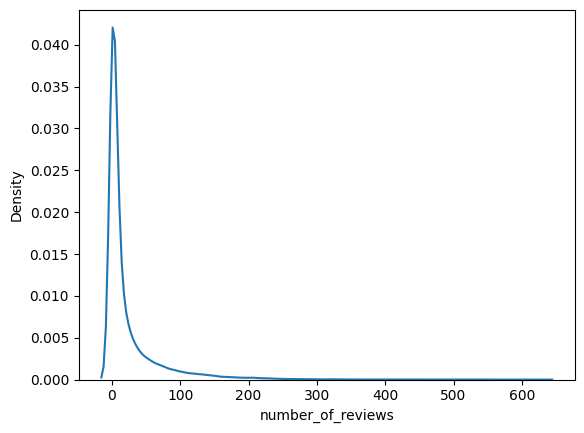

In [413]:
sns.kdeplot(new_data['number_of_reviews'])

#TREAT OUTLIERS

In [414]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [415]:
new_data=remove_outliers(new_data,'price')


In [416]:
new_data=remove_outliers(new_data,'minimum_nights')

In [417]:
new_data.head(2)

host_id host_name neighbourhood_group neighbourhood  latitude  longitude  \
0     2787      John            Brooklyn    Kensington  40.64749  -73.97237   
1     2845  Jennifer           Manhattan       Midtown  40.75362  -73.98377   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355

<Axes: xlabel='minimum_nights', ylabel='Density'>

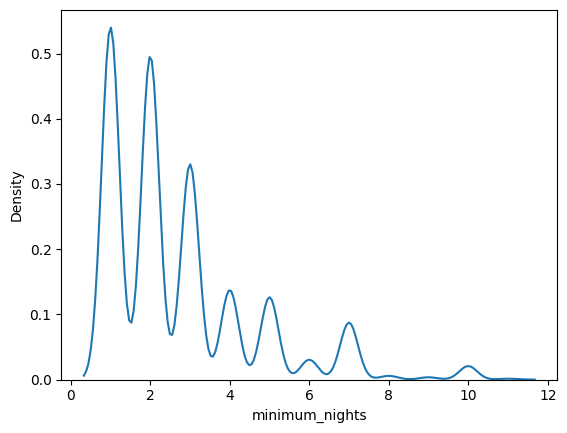

In [418]:
sns.kdeplot(new_data['minimum_nights'])

In [419]:
new_data['minimum_nights'].unique()

array([ 1,  3, 10,  2,  5,  4,  7,  9,  6,  8, 11])

 minimum night usually between  1 to 11

<Axes: xlabel='price', ylabel='Density'>

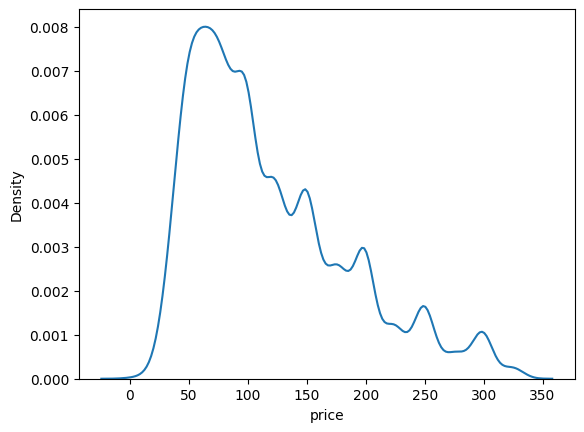

In [420]:
sns.kdeplot(new_data['price'])

price usually lie between 1 to 350

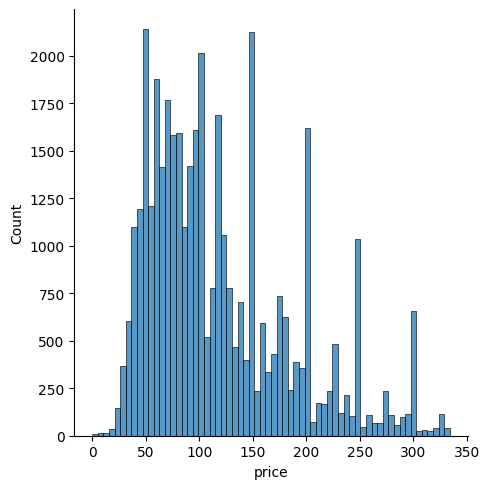

In [421]:
sns.displot(new_data['price'])

In [422]:
new_data['price'].describe()

count    39738.000000
mean       119.001258
std         67.184264
min          0.000000
25%         65.000000
50%        100.000000
75%        154.750000
max        334.000000
Name: price, dtype: float64

In [423]:
new_data=new_data[new_data['price']!=0]

In [424]:
new_data

host_id      host_name neighbourhood_group       neighbourhood  \
0          2787           John            Brooklyn          Kensington   
1          2845       Jennifer           Manhattan             Midtown   
2          4632      Elisabeth           Manhattan              Harlem   
3          4869    LisaRoxanne            Brooklyn        Clinton Hill   
4          7192          Laura           Manhattan         East Harlem   
...         ...            ...                 ...                 ...   
48890   8232441        Sabrina            Brooklyn  Bedford-Stuyvesant   
48891   6570630        Marisol            Brooklyn            Bushwick   
48892  23492952  Ilgar & Aysel           Manhattan              Harlem   
48893  30985759            Taz           Manhattan      Hell's Kitchen   
48894  68119814     Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
0      40.64749  -73.97237     Private room    149               1   
1      40.75362  -73.98377  Entire home/apt    225               1   
2      40.80902  -73.94190     Private room    150               3   
3      40.68514  -73.95976  Entire home/apt     89               1   
4      40.79851  -73.94399  Entire home/apt     80              10   
...         ...        ...              ...    ...             ...   
48890  40.67853  -73.94995     Private room     70               2   
48891  40.70184  -73.93317     Private room     40               4   
48892  40.81475  -73.94867  Entire home/apt    115              10   
48893  40.75751  -73.99112      Shared room     55               1   
48894  40.76404  -73.98933     Private room     90               7   

       number_of_reviews last_review  reviews_per_month  \
0                      9  2018-10-19               0.21   
1                     45  2019-05-21               0.38   
2                      0         NaN                NaN   
3                    270  2019-07-05               4.64   
4                      9  2018-11-19               0.10   
...                  ...         ...                ...   
48890                  0         NaN                NaN   
48891                  0         NaN                NaN   
48892                  0         NaN                NaN   
48893                  0         NaN                NaN   
48894                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
4                                   1                 0  
...                               ...               ...  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23  

[39729 rows x 14 columns]

# total_listings PER HOST

In [425]:
host_listing = (
    new_data
    .groupby(['host_id','host_name'])['calculated_host_listings_count']
    .sum()
    .reset_index(name='total_listings')
)


In [426]:
host_listing.head()

host_id host_name  total_listings
0     2571     Teedo               1
1     2787      John              36
2     2845  Jennifer               4
3     2881      Loli               4
4     3151      Eric               1

In [427]:
host_listing.max()

host_id           274321313
host_name                소정
total_listings        47088
dtype: object

In [428]:
top_hosts=host_listing.sort_values(by='total_listings',ascending=False).reset_index().head(10)

In [429]:
top_hosts

index    host_id            host_name  total_listings
0  30060  219517861         Sonder (NYC)           47088
1  29090  190921808                 John            1786
2  26043  119669058              Melissa            1156
3  29819  213781715               Anting            1023
4  30303  224414117              Gabriel             870
5   1013     417504  The Box House Hotel             644
6  31308  252604696                 Erin             400
7   9635    9864136              Anthony             338
8  26812  134184451       Hillside Hotel             324
9  29408  201015598               Anchor             289

In [430]:
import seaborn as sns

#TOP 10 HOST NAME BY LISTING

/tmp/ipython-input-1436895459.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hosts,y='host_name',x='total_listings',palette='viridis')


<Axes: xlabel='total_listings', ylabel='host_name'>

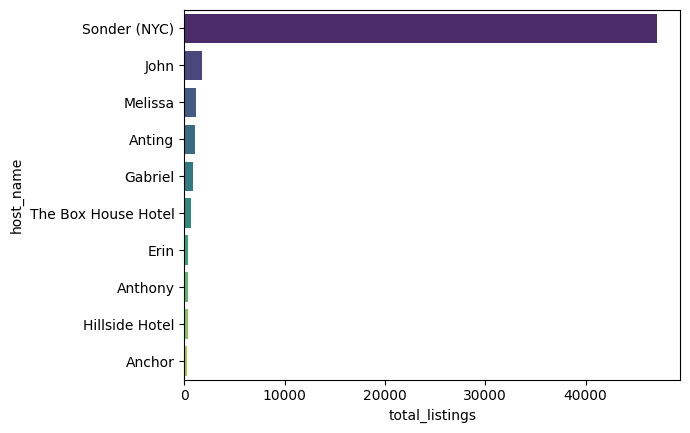

In [431]:
sns.barplot(data=top_hosts,y='host_name',x='total_listings',palette='viridis')

Sonder Host has completed the most listing

#TOP LISITNG BY ROOM TYPE

In [432]:
roomtype_listing = (
    new_data
    .groupby(['room_type'])['calculated_host_listings_count']
    .sum()
    .reset_index(name='total_listings')
)

top_roomtype_listing=roomtype_listing.sort_values(by='total_listings',ascending=False).reset_index().head(10)

/tmp/ipython-input-3927005370.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_roomtype_listing,x='room_type',y='total_listings',palette='flare')


<Axes: xlabel='room_type', ylabel='total_listings'>

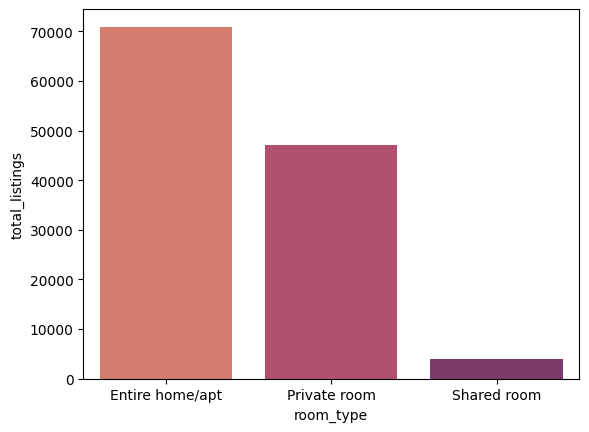

In [433]:
sns.barplot(data=top_roomtype_listing,x='room_type',y='total_listings',palette='flare')

most listed rooom type is entire home

In [434]:
neighbourhood_listing = (
    new_data
    .groupby(['neighbourhood_group'])['calculated_host_listings_count']
    .sum()
    .reset_index(name='total_listings')
)

top_neighbourhood_listing=neighbourhood_listing.sort_values(by='total_listings',ascending=False).reset_index().head(10)

/tmp/ipython-input-1809680391.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_neighbourhood_listing,x='neighbourhood_group',y='total_listings',palette='crest')


<Axes: xlabel='neighbourhood_group', ylabel='total_listings'>

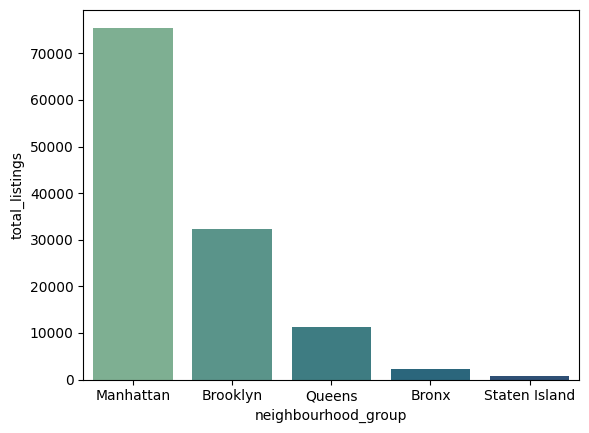

In [435]:
sns.barplot(data=top_neighbourhood_listing,x='neighbourhood_group',y='total_listings',palette='crest')

ManhaTTAN HAS THE HIGHEST LISTING

In [436]:
neighbourhood_multiple_listing = (
    new_data
    .groupby(['neighbourhood'])['calculated_host_listings_count']
    .sum()
    .reset_index(name='total_listings')
)

top_neighbourhood_2_listing=neighbourhood_multiple_listing.sort_values(by='total_listings',ascending=False).reset_index().head(10)

In [437]:
top_neighbourhood_2_listing

index       neighbourhood  total_listings
0     73  Financial District           40480
1    136         Murray Hill            7439
2     13  Bedford-Stuyvesant            7294
3     94      Hell's Kitchen            5284
4    213        Williamsburg            4595
5     28            Bushwick            4061
6     93              Harlem            3813
7     90          Greenpoint            2669
8     51       Crown Heights            2235
9    126             Midtown            2017

/tmp/ipython-input-1265976070.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_neighbourhood_2_listing,x='neighbourhood',y='total_listings',palette='crest',)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Financial District'),
  Text(1, 0, 'Murray Hill'),
  Text(2, 0, 'Bedford-Stuyvesant'),
  Text(3, 0, "Hell's Kitchen"),
  Text(4, 0, 'Williamsburg'),
  Text(5, 0, 'Bushwick'),
  Text(6, 0, 'Harlem'),
  Text(7, 0, 'Greenpoint'),
  Text(8, 0, 'Crown Heights'),
  Text(9, 0, 'Midtown')])

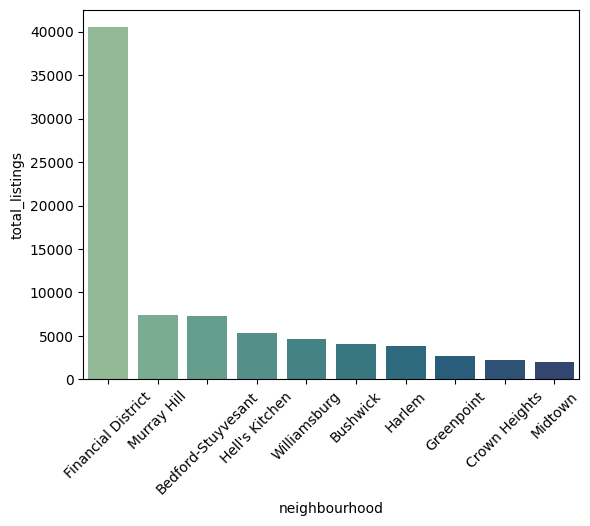

In [438]:
sns.barplot(data=top_neighbourhood_2_listing,x='neighbourhood',y='total_listings',palette='crest',)
plt.xticks(rotation=45)

Financials District has the highest listing

#POPULAR HOST NAME BY REVIEWS

In [439]:
host_reviews = (
    new_data
    .groupby(['host_id','host_name'])['number_of_reviews']
    .sum()
    .reset_index(name='total_reviews')
)


In [440]:
host_reviews

host_id  host_name  total_reviews
0           2571      Teedo             27
1           2787       John            105
2           2845   Jennifer             46
3           2881       Loli            390
4           3151       Eric              1
...          ...        ...            ...
32343  274273284  Anastasia              0
32344  274298453     Adrien              0
32345  274307600   Jonathan              0
32346  274311461      Scott              0
32347  274321313        Kat              0

[32348 rows x 3 columns]

In [441]:
top_hosts_reviews=host_reviews.sort_values(by='total_reviews',ascending=False).reset_index().head(10)

In [442]:
top_hosts_reviews

index   host_id                       host_name  total_reviews
0  18343  37312959                            Maya           2273
1    885    344035  Brooklyn&   Breakfast    -Len-           2205
2  16017  26432133                        Danielle           2017
3  17972  35524316                    Yasu & Akiko           1971
4  18891  40176101                           Brady           1818
5   6180   4734398                              Jj           1798
6  12573  16677326                  Alex And Zeena           1355
7   7778   6885157                           Randy           1346
8  15045  23591164                          Angela           1269
9  22006  59529529                             Han           1229

#popular host based on reviews

/tmp/ipython-input-1350977210.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hosts_reviews,y='host_name',x='total_reviews',palette='viridis')


<Axes: xlabel='total_reviews', ylabel='host_name'>

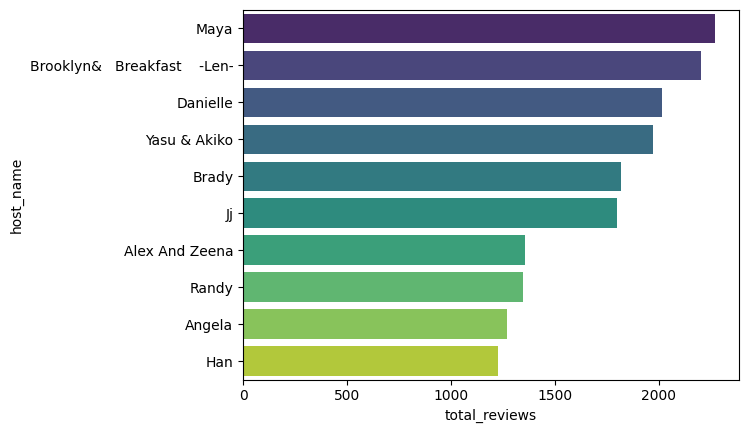

In [443]:
sns.barplot(data=top_hosts_reviews,y='host_name',x='total_reviews',palette='viridis')

Maya, Len and danielle and yasu have the highest reviews


#popular room type based on reviews

In [444]:
roomtype_reviews = (
    new_data
    .groupby(['room_type'])['number_of_reviews']
    .sum()
    .reset_index(name='total_reviews')
)

top_room_type_reviews=roomtype_reviews.sort_values(by='total_reviews',ascending=False).reset_index().head(10)

/tmp/ipython-input-1785491915.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_room_type_reviews,x='room_type',y='total_reviews',palette='flare')


<Axes: xlabel='room_type', ylabel='total_reviews'>

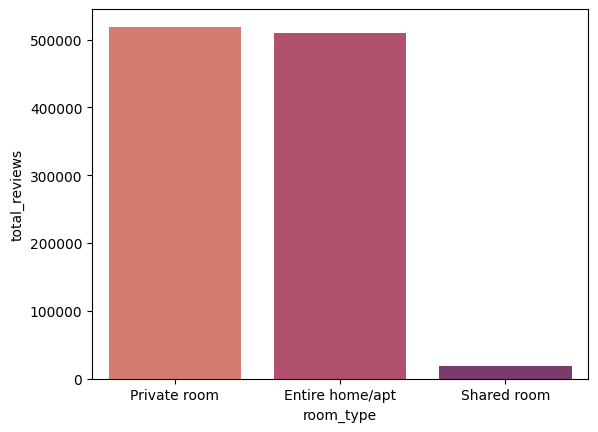

In [445]:
sns.barplot(data=top_room_type_reviews,x='room_type',y='total_reviews',palette='flare')

private and entire home has really good number of reviews in total

#LAT AND LONG WITH RESPECT LOCALITY

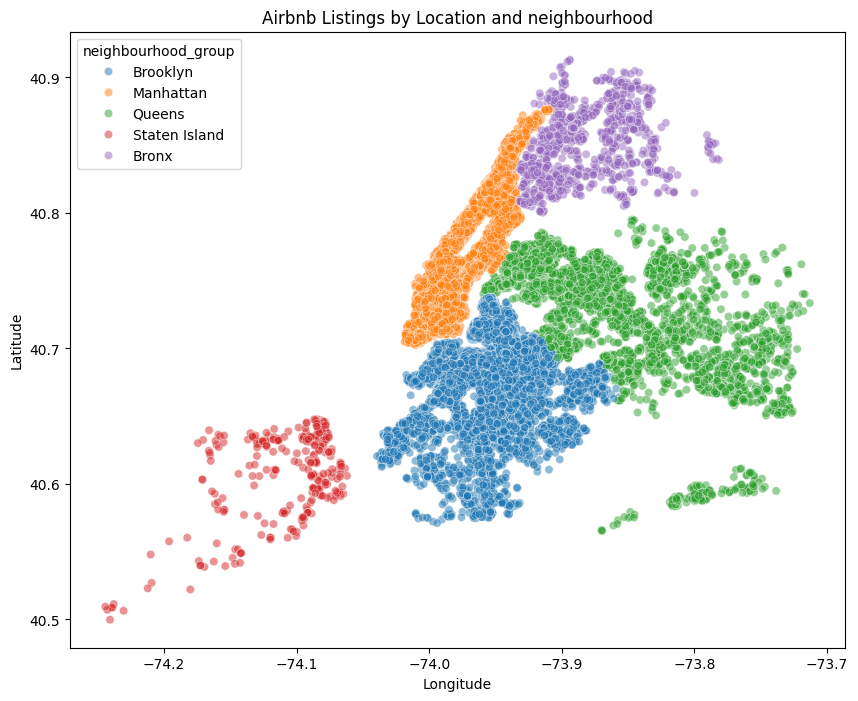

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=new_data, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5)
plt.title('Airbnb Listings by Location and neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


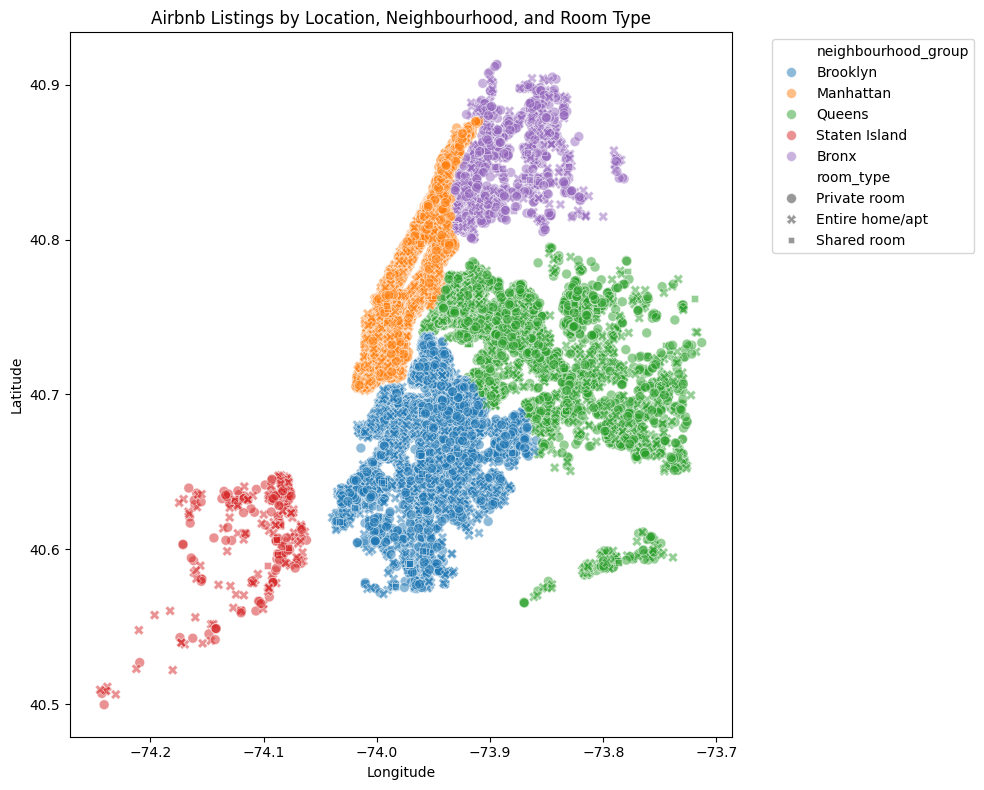

In [447]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=new_data,
    x='longitude',
    y='latitude',
    hue='neighbourhood_group',
    style='room_type',  # 👈 different marker shapes
    alpha=0.5,s=50
)
plt.title('Airbnb Listings by Location, Neighbourhood, and Room Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
plt.show()


#price with respect to area

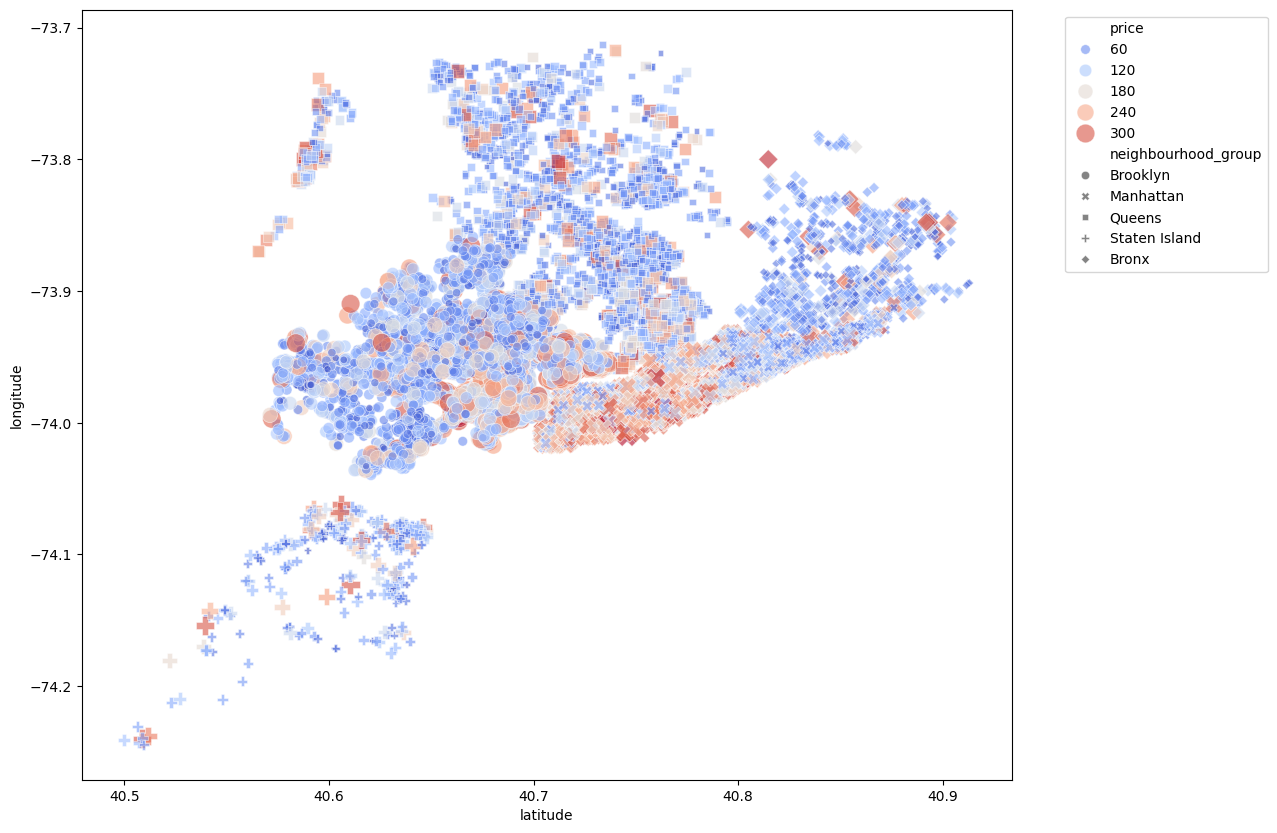

In [448]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=new_data,
    x='latitude',
    y='longitude',
    hue='price',
    palette='coolwarm',
    size='price',
    sizes=(20, 200),
    style='neighbourhood_group',
    edgecolor='w',
    alpha=0.6  # makes overlapping points visible
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  # move legend outside
plt.show()


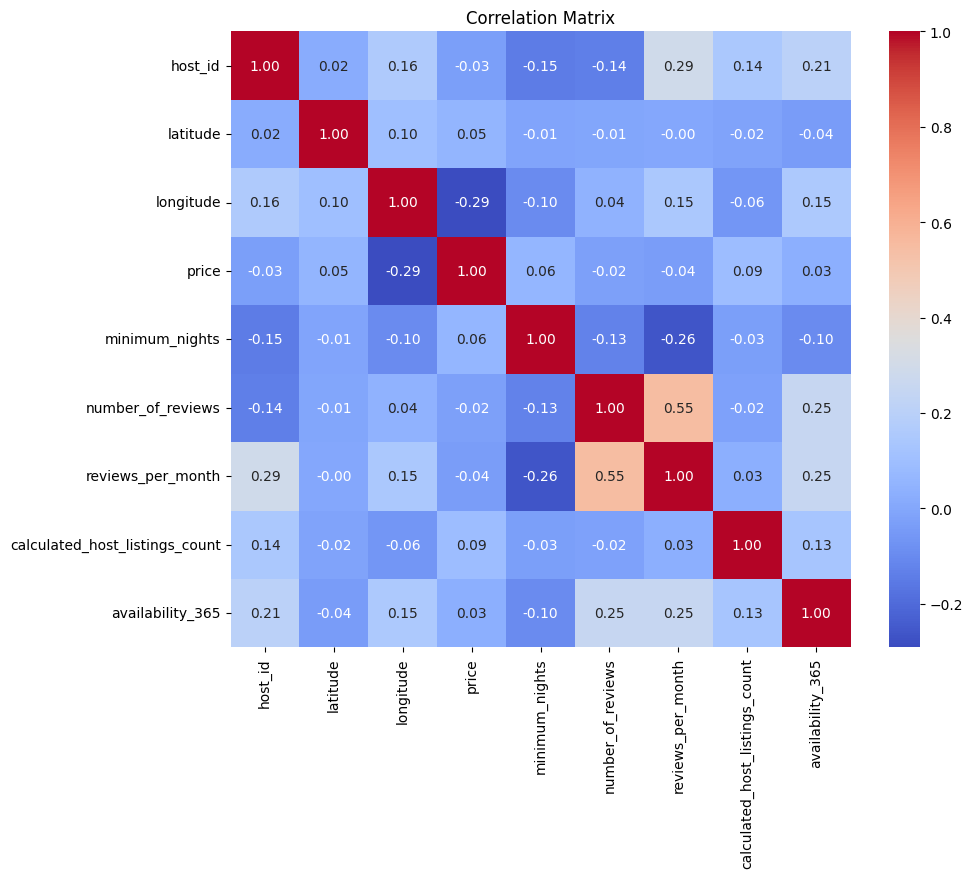

In [449]:
numerical_df = new_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [450]:
#there is no such relation between each other

#neighbourhood signficance with respect to  price

In [451]:
new_data

host_id      host_name neighbourhood_group       neighbourhood  \
0          2787           John            Brooklyn          Kensington   
1          2845       Jennifer           Manhattan             Midtown   
2          4632      Elisabeth           Manhattan              Harlem   
3          4869    LisaRoxanne            Brooklyn        Clinton Hill   
4          7192          Laura           Manhattan         East Harlem   
...         ...            ...                 ...                 ...   
48890   8232441        Sabrina            Brooklyn  Bedford-Stuyvesant   
48891   6570630        Marisol            Brooklyn            Bushwick   
48892  23492952  Ilgar & Aysel           Manhattan              Harlem   
48893  30985759            Taz           Manhattan      Hell's Kitchen   
48894  68119814     Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
0      40.64749  -73.97237     Private room    149               1   
1      40.75362  -73.98377  Entire home/apt    225               1   
2      40.80902  -73.94190     Private room    150               3   
3      40.68514  -73.95976  Entire home/apt     89               1   
4      40.79851  -73.94399  Entire home/apt     80              10   
...         ...        ...              ...    ...             ...   
48890  40.67853  -73.94995     Private room     70               2   
48891  40.70184  -73.93317     Private room     40               4   
48892  40.81475  -73.94867  Entire home/apt    115              10   
48893  40.75751  -73.99112      Shared room     55               1   
48894  40.76404  -73.98933     Private room     90               7   

       number_of_reviews last_review  reviews_per_month  \
0                      9  2018-10-19               0.21   
1                     45  2019-05-21               0.38   
2                      0         NaN                NaN   
3                    270  2019-07-05               4.64   
4                      9  2018-11-19               0.10   
...                  ...         ...                ...   
48890                  0         NaN                NaN   
48891                  0         NaN                NaN   
48892                  0         NaN                NaN   
48893                  0         NaN                NaN   
48894                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
4                                   1                 0  
...                               ...               ...  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23  

[39729 rows x 14 columns]

#relationship between neighbourhood and price

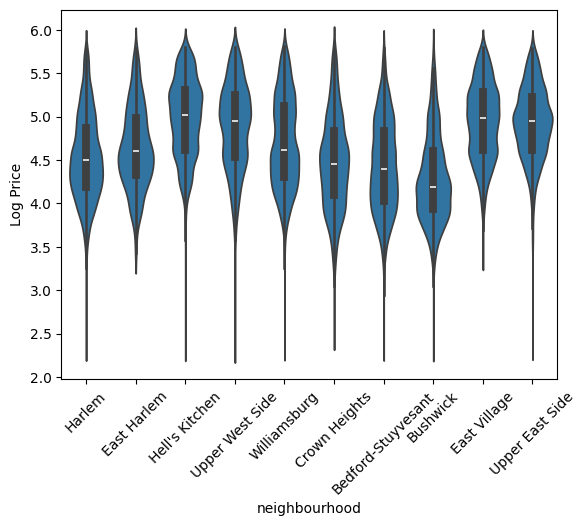

In [452]:
import numpy as np
top_neighbourhoods = new_data['neighbourhood'].value_counts().nlargest(10).index
sns.violinplot(
    x='neighbourhood', y=np.log1p(new_data['price']),  # log1p avoids log(0)
    data=new_data[new_data['neighbourhood'].isin(top_neighbourhoods)]
)
plt.xticks(rotation=45)
plt.ylabel('Log Price')
plt.show()


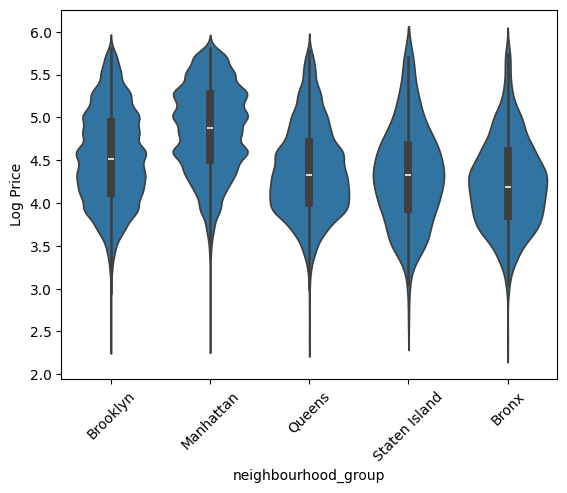

In [453]:
import numpy as np
top_neighbourhoods = new_data['neighbourhood_group'].value_counts().nlargest(10).index
sns.violinplot(
    x='neighbourhood_group', y=np.log1p(new_data['price']),  # log1p avoids log(0)
    data=new_data[new_data['neighbourhood_group'].isin(top_neighbourhoods)]
)
plt.xticks(rotation=45)
plt.ylabel('Log Price')
plt.show()


manhatanb has the highest price then rest and bronx has the lowest

#relationship between neighbourhood group vs price

In [454]:
grouped = new_data.groupby("neighbourhood_group")["price"].mean().reset_index()

selectprice_df=grouped.sort_values(by="price",ascending=False)

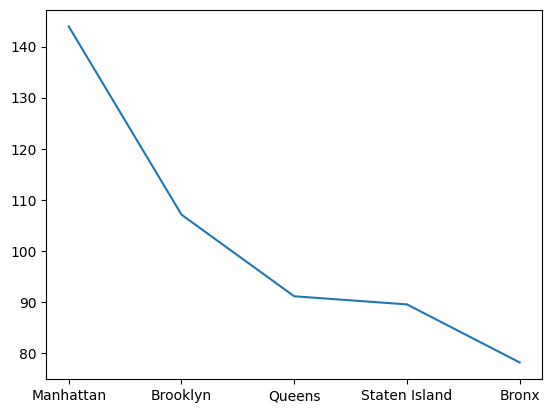

In [455]:
plt.plot(selectprice_df['neighbourhood_group'],selectprice_df['price'])

manhattan has the highest price

#relationship between neighbourhood vs price

In [456]:
grouped = new_data.groupby("neighbourhood")["price"].mean().reset_index()

selectprice_df_neigh=grouped.sort_values(by="price",ascending=False)

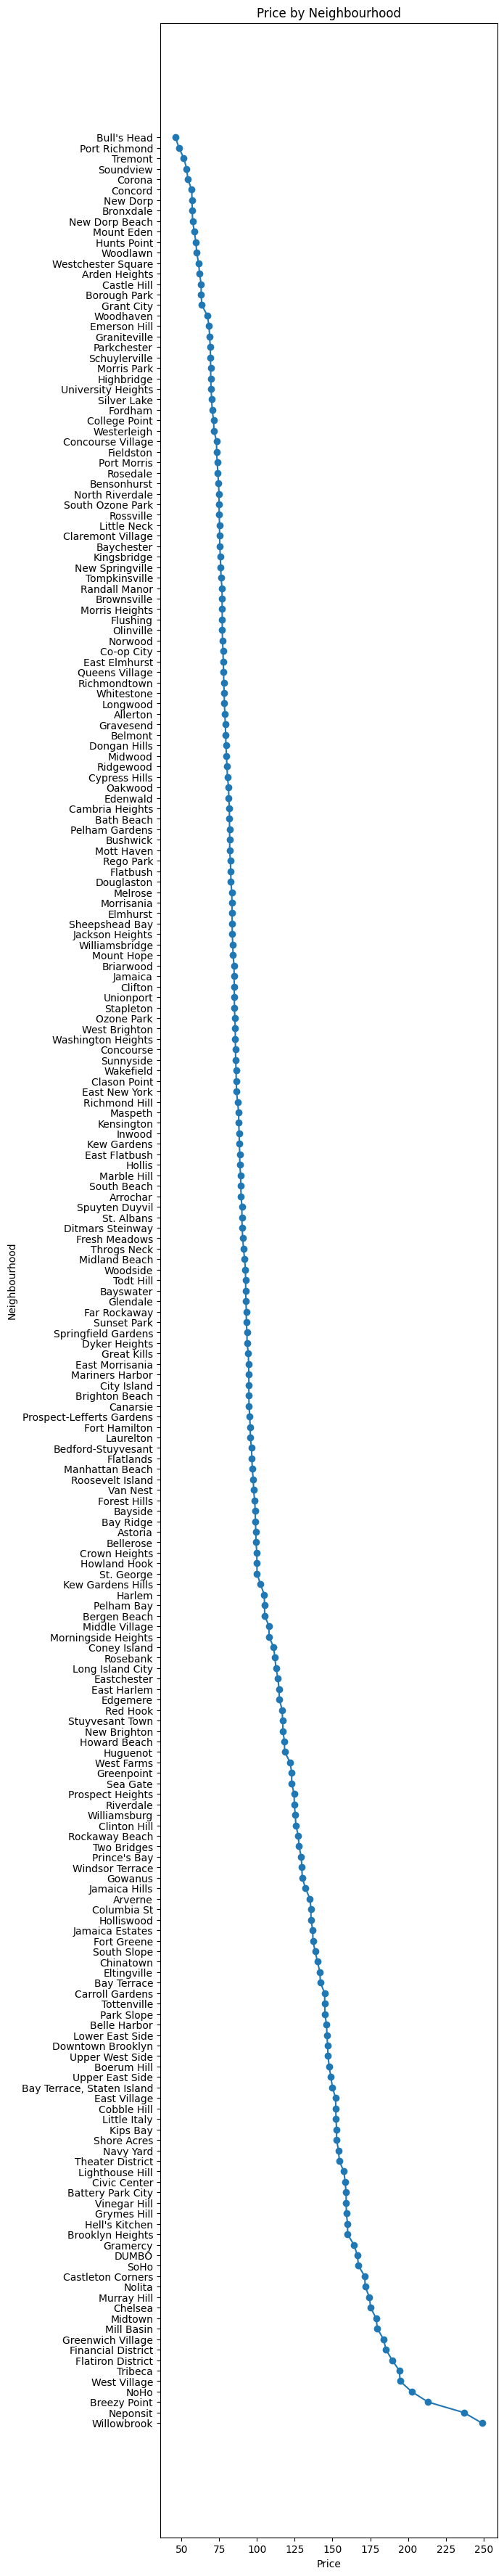

In [457]:
plt.figure(figsize=(6,45))
plt.plot(selectprice_df_neigh['price'], selectprice_df_neigh['neighbourhood'], marker="o", linestyle="-")
plt.title("Price by Neighbourhood")
plt.xlabel("Price")
plt.ylabel("Neighbourhood")
plt.show()


In [458]:
len(top_neighbourhoods)

5

In [459]:
new_data['neighbourhood'].value_counts().nlargest(100).index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'East Village', 'Hell's Kitchen', 'Upper West Side', 'Crown Heights',
       'Upper East Side', 'East Harlem', 'Greenpoint', 'Midtown',
       'Washington Heights', 'Astoria', 'Chelsea', 'Lower East Side',
       'Flatbush', 'West Village', 'Prospect-Lefferts Gardens',
       'Long Island City', 'Clinton Hill', 'Financial District',
       'East Flatbush', 'Park Slope', 'Fort Greene', 'Flushing', 'Sunset Park',
       'Ridgewood', 'Chinatown', 'Sunnyside', 'Morningside Heights',
       'Kips Bay', 'Prospect Heights', 'Greenwich Village', 'Ditmars Steinway',
       'Gramercy', 'South Slope', 'SoHo', 'Inwood', 'Murray Hill', 'Jamaica',
       'East New York', 'Gowanus', 'Carroll Gardens', 'Nolita', 'Elmhurst',
       'East Elmhurst', 'Jackson Heights', 'Woodside', 'Kensington',
       'Theater District', 'Sheepshead Bay', 'Canarsie', 'Boerum Hill',
       'Windsor Terrace', 'Forest Hills', 'Borough Park', 'Brooklyn

In [460]:
room_per_price=(new_data.groupby('room_type')['price'].mean().reset_index()).sort_values(by='price',ascending=False)


In [461]:
room_per_price

room_type       price
0  Entire home/apt  162.172034
1     Private room   80.852359
2      Shared room   62.037374

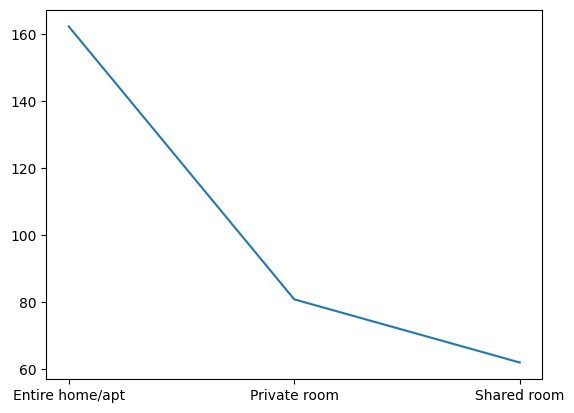

In [462]:
plt.plot(room_per_price['room_type'],room_per_price['price'])

In [463]:
new_data.head()

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19               0.21                               6   
1  2019-05-21               0.38                               2   
2         NaN                NaN                               1   
3  2019-07-05               4.64                               1   
4  2018-11-19               0.10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

In [464]:
def availability_category(x):
    if x == 0:
        return "Not Available"
    elif x < 180:
        return "Rarely"
    elif x < 365:
        return "Seasonal"
    else:
        return "All Year"

new_data["availability_cat"] = new_data["availability_365"].apply(availability_category)

print(new_data["availability_cat"].value_counts())


availability_cat
Not Available    15682
Rarely           14254
Seasonal          9037
All Year           756
Name: count, dtype: int64


In [465]:
availbility_per_price=(new_data.groupby('availability_cat')['price'].mean().reset_index()).sort_values(by='price',ascending=False)


In [466]:
availbility_per_price.head()

availability_cat       price
3         Seasonal  123.605953
2           Rarely  120.060334
0         All Year  115.776455
1    Not Available  115.608851

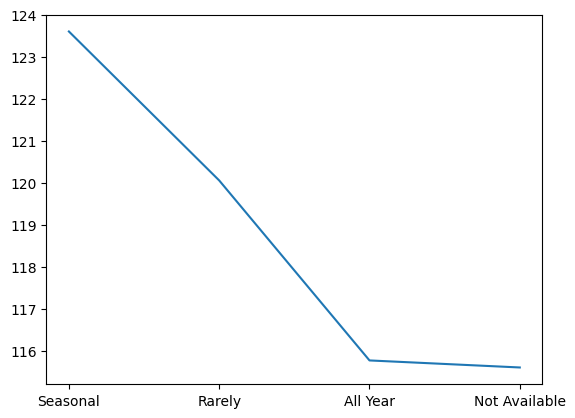

In [467]:
plt.plot(availbility_per_price['availability_cat'],availbility_per_price['price'])

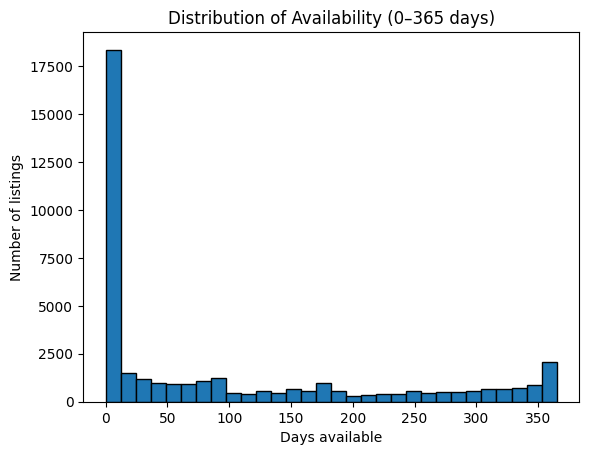

In [468]:
plt.hist(new_data["availability_365"], bins=30, edgecolor="black")

plt.title("Distribution of Availability (0–365 days)")
plt.xlabel("Days available")
plt.ylabel("Number of listings")
plt.show()


# BARPLOT TO SEE THE ANALYSIS OF ROOM TYPE WITH RESPECT TO PRICE , WITH NEIGHBOURHOOD

<Axes: xlabel='room_type', ylabel='price'>

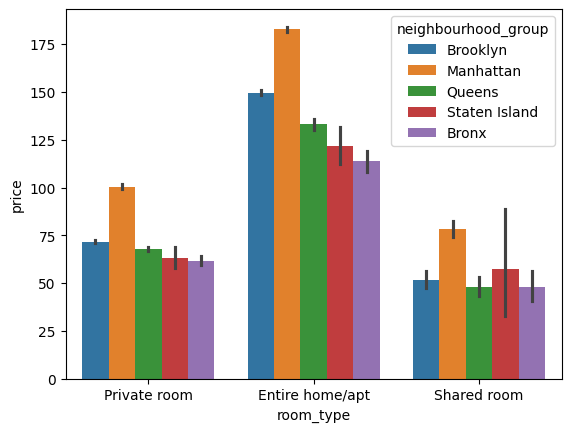

In [469]:
sns.barplot(x='room_type',y='price',hue='neighbourhood_group',data=new_data)


<Axes: xlabel='minimum_nights', ylabel='price'>

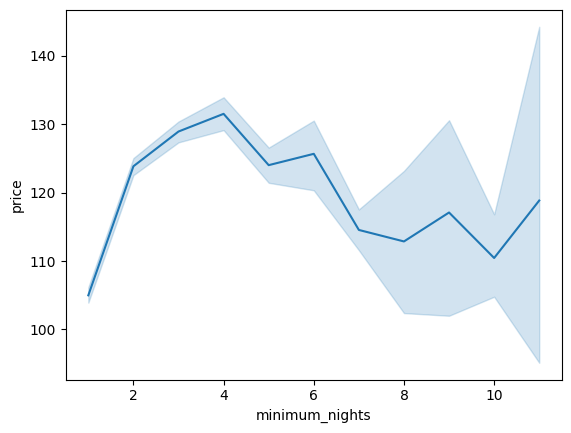

In [470]:
sns.lineplot(x='minimum_nights',y='price',data=new_data)

In [471]:
import pandas as pd


In [472]:
new_data['number_of_reviews'] = pd.to_numeric(new_data['number_of_reviews'], errors='coerce')
new_data['price'] = pd.to_numeric(new_data['price'], errors='coerce')
new_data = new_data.dropna(subset=['number_of_reviews', 'price'])


/tmp/ipython-input-1942806344.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = new_data.groupby(['review_bin_mid', 'room_type'])['price'].mean().reset_index()


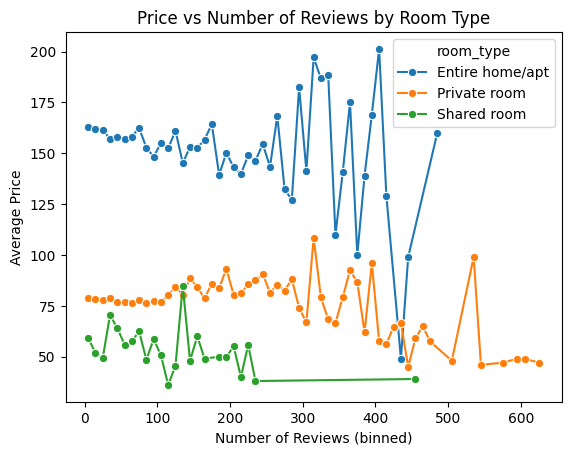

In [473]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric columns
new_data['number_of_reviews'] = pd.to_numeric(new_data['number_of_reviews'], errors='coerce')
new_data['price'] = pd.to_numeric(new_data['price'], errors='coerce')
new_data = new_data.dropna(subset=['number_of_reviews','price'])

# Create bins
bins = np.arange(0, new_data['number_of_reviews'].max() + 10, 10)
new_data['review_bin'] = pd.cut(new_data['number_of_reviews'], bins=bins)

# Convert bins to midpoint for plotting
new_data['review_bin_mid'] = new_data['review_bin'].apply(lambda x: x.mid if pd.notnull(x) else np.nan)

# Group by bin midpoint and room_type
bin_avg = new_data.groupby(['review_bin_mid', 'room_type'])['price'].mean().reset_index()

# Plot
sns.lineplot(x='review_bin_mid', y='price', hue='room_type', data=bin_avg, marker='o')
plt.xlabel("Number of Reviews (binned)")
plt.ylabel("Average Price")
plt.title("Price vs Number of Reviews by Room Type")
plt.show()


In [474]:
from scipy.stats import f_oneway

groups = [new_data[new_data['neighbourhood']==n]['price'] for n in top_neighbourhoods]


f_stat, p_val = f_oneway(*groups)
print("ANOVA p-value:", p_val)


ANOVA p-value: nan


/tmp/ipython-input-2082850722.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = f_oneway(*groups)


In [475]:
print(groups)

[Series([], Name: price, dtype: int64), Series([], Name: price, dtype: int64), Series([], Name: price, dtype: int64), Series([], Name: price, dtype: int64), Series([], Name: price, dtype: int64)]


In [476]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=new_data['price'],
                          groups=new_data['neighbourhood'],
                          alpha=0.05)
print(tukey.summary())


/usr/local/lib/python3.12/dist-packages/scipy/integrate/_quadpack_py.py:1264: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
          group1                     group2            meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------------------------------
                  Allerton              Arden Heights  -16.7561    1.0 -180.0795 146.5673  False
                  Allerton                   Arrochar   10.7439    1.0  -63.7349  85.2227  False
                  Allerton                    Arverne   56.3411  0.017    2.9148 109.7675   True
                  Allerton                    Astoria   20.5065    1.0  -23.2298  64.2429  False
                  Allerton                 Bath Beach    3.0086    1.0  -75.7634  81.7807  False
                  Allerton          Battery Park City   80.2212    0.0    20.947 139.4954   True
                  Allerton                  Bay Ridge    20.165    1.0  -29.5625  69.8924  False
                  Allerton    

In [477]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Compute median price per neighborhood
median_price = new_data.groupby('neighbourhood')['price'].median().sort_values(ascending=False)
median_price = median_price.reset_index()

# 2. Run Tukey HSD test
tukey = pairwise_tukeyhsd(endog=new_data['price'],
                          groups=new_data['neighbourhood'],
                          alpha=0.05)

# Convert Tukey HSD results to DataFrame
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])



/usr/local/lib/python3.12/dist-packages/scipy/integrate/_quadpack_py.py:1264: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


/tmp/ipython-input-933528809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood', y='price', data=top10_median, palette='coolwarm')


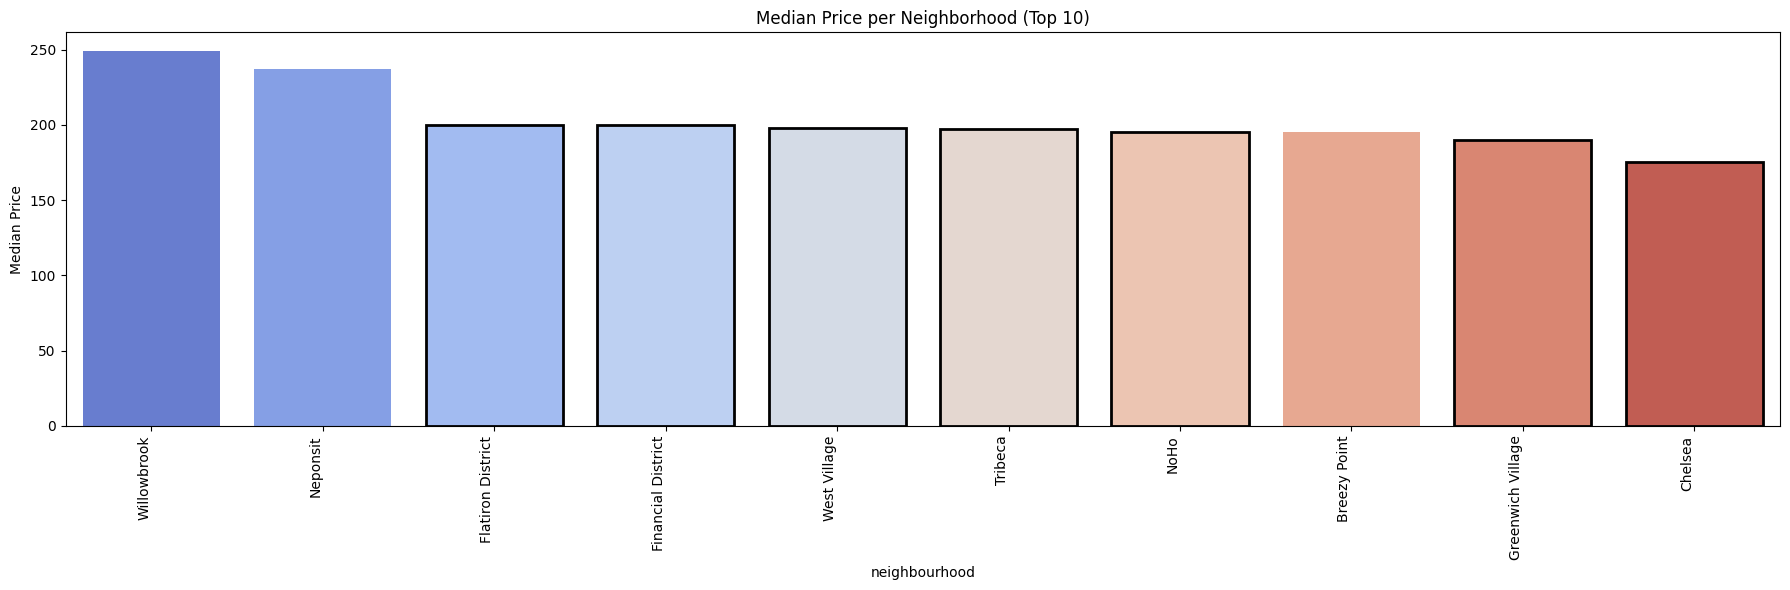

In [478]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Keep only top 10 neighborhoods by median price
top10_median = median_price.head(10)
significant = tukey_df[tukey_df['reject'] == True]

# 2. Identify significant neighborhoods among the top 10
sig_neighs = set(significant['group1']).union(set(significant['group2']))
sig_neighs_top10 = [n for n in top10_median['neighbourhood'] if n in sig_neighs]

# 3. Plot median prices
plt.figure(figsize=(18,6))
sns.barplot(x='neighbourhood', y='price', data=top10_median, palette='coolwarm')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Median Price')
plt.title('Median Price per Neighborhood (Top 10)')

# 4. Highlight significant neighborhoods
for i, row in enumerate(top10_median.itertuples()):
    if row.neighbourhood in sig_neighs_top10:
        plt.gca().patches[i].set_edgecolor('black')
        plt.gca().patches[i].set_linewidth(2)

plt.tight_layout()
plt.show()


Based on tukey hsd test , it helps us to understand the significant differnce between the category after rejecting null hypothesis using anova , i found, there is significant difference between price and neighbour .

Taller bars → higher median price




Black-edged bars → neighborhoods with at least one significant difference compared to others

In [479]:
# 1. Context

# Suppose you have prices across multiple neighborhoods.

# You run a one-way ANOVA:

# Null hypothesis (H₀): All group means are equal.

# Alternative hypothesis (H₁): At least one group mean is different.

# ANOVA tells you if there is a difference somewhere, but it does not tell you which pairs of groups are different.

# 2. Why Tukey HSD

# Tukey HSD is a post-hoc test:

# It compares all possible pairs of group means.

# It adjusts for multiple comparisons to control the family-wise error rate (FWER).

# Provides:

# Mean difference between pairs

# Confidence interval

# Adjusted p-value

# Decision on significance (reject True/False)

# Example: After ANOVA shows a significant difference among neighborhoods, Tukey HSD tells you which neighborhoods’ prices are significantly higher or lower than others.

ANOVA = “There is a difference somewhere”

Tukey HSD = “Here’s exactly which pairs are different”




#Room type signficance with respect to  price

In [480]:
new_data.head()

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19               0.21                               6   
1  2019-05-21               0.38                               2   
2         NaN                NaN                               1   
3  2019-07-05               4.64                               1   
4  2018-11-19               0.10                               1   

   availability_365 availability_cat      review_bin review_bin_mid  
0               365         All Year     (0.0, 10.0]            5.0  
1               355         Seasonal    (40.0, 50.0]           45.0  
2               365         All Year             NaN            NaN  
3               194         Seasonal  (260.0, 270.0]          265.0  
4                 0    Not Available     (0.0, 10.0]            5.0

In [481]:
from scipy.stats import f_oneway

top_room_type=[new_data[new_data["room_type"]==n]['price'] for n in new_data['room_type'].value_counts().nlargest(10).index]

f,p=f_oneway(*top_room_type)


print(f,p)

11942.7911113069 0.0


In [482]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

top_pairwise=new_data['room_type'].value_counts().nlargest(10).index

subset=new_data[new_data['room_type'].isin(top_pairwise)]


tukey=pairwise_tukeyhsd(endog=subset['price'],groups=subset['room_type'],alpha=0.05)



In [483]:
tukey.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

#there is a significant difference between group

In [484]:
new_data.head()

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19               0.21                               6   
1  2019-05-21               0.38                               2   
2         NaN                NaN                               1   
3  2019-07-05               4.64                               1   
4  2018-11-19               0.10                               1   

   availability_365 availability_cat      review_bin review_bin_mid  
0               365         All Year     (0.0, 10.0]            5.0  
1               355         Seasonal    (40.0, 50.0]           45.0  
2               365         All Year             NaN            NaN  
3               194         Seasonal  (260.0, 270.0]          265.0  
4                 0    Not Available     (0.0, 10.0]            5.0

In [485]:
from scipy.stats import pearsonr

res_min1=pearsonr(new_data['minimum_nights'],new_data['price'])

In [486]:
from scipy.stats import pearsonr

res_review=pearsonr(new_data['number_of_reviews'],new_data['price'])

In [487]:
res_review

PearsonRResult(statistic=np.float64(-0.024519440848341352), pvalue=np.float64(1.019540146830986e-06))

minimum night and number of reviews  have significance but dont have relation

In [488]:
new_data['minimum_nights'] = pd.to_numeric(new_data['minimum_nights'], errors='coerce')
new_data['number_of_reviews'] = pd.to_numeric(new_data['number_of_reviews'], errors='coerce')


<Axes: xlabel='price', ylabel='Density'>

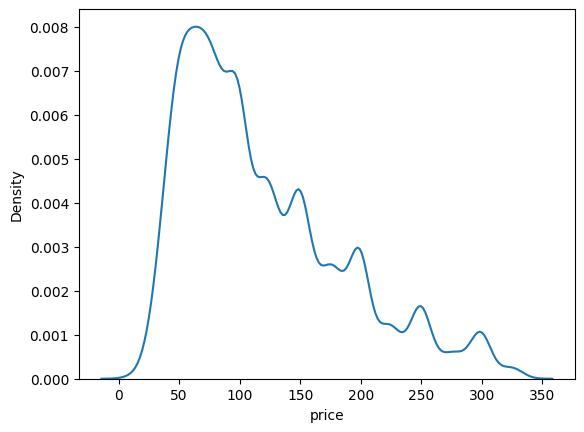

In [489]:
sns.kdeplot(new_data['price'])


In [490]:
new_data['price_transformed']=np.log1p(new_data['price'])

<Axes: xlabel='price_transformed', ylabel='Density'>

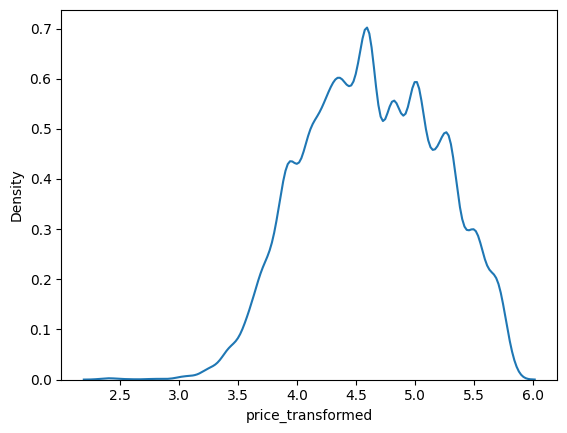

In [491]:
sns.kdeplot(new_data['price_transformed'])

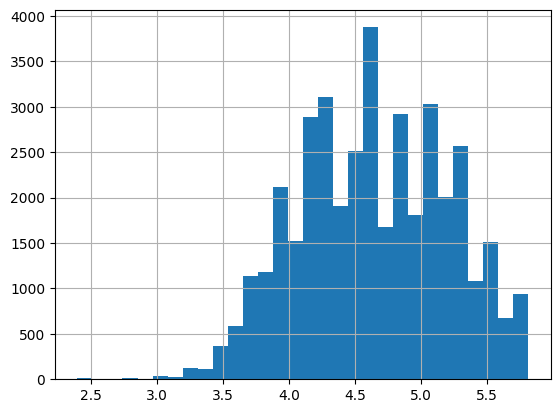

In [492]:
import matplotlib.pyplot as plt

new_data['price_transformed'].hist(bins=30)
plt.show()

In [493]:
from scipy.stats import skew

skewness=skew(new_data['price_transformed'])

print('skewness:',skewness)

skewness: -0.0677151502492001


In [494]:
(len(new_data)*20)/100

7945.8

In [495]:
split_index = int(round(len(new_data) * 0.2))

test_x  = new_data[:split_index]   # first 20%
train_x = new_data[split_index:]   # remaining 80%


In [496]:
import statsmodels.formula.api as smf

model = smf.ols(
    formula='price_transformed ~ C(neighbourhood_group) + C(room_type) + minimum_nights + number_of_reviews',
    data=train_x
).fit()

# View summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      price_transformed   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     4064.
Date:                Sat, 06 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:17:18   Log-Likelihood:                -16087.
No. Observations:               31783   AIC:                         3.219e+04
Df Residuals:                   31774   BIC:                         3.227e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [497]:
test_x.head()

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19               0.21                               6   
1  2019-05-21               0.38                               2   
2         NaN                NaN                               1   
3  2019-07-05               4.64                               1   
4  2018-11-19               0.10                               1   

   availability_365 availability_cat      review_bin review_bin_mid  \
0               365         All Year     (0.0, 10.0]            5.0   
1               355         Seasonal    (40.0, 50.0]           45.0   
2               365         All Year             NaN            NaN   
3               194         Seasonal  (260.0, 270.0]          265.0   
4                 0    Not Available     (0.0, 10.0]            5.0   

   price_transformed  
0           5.010635  
1           5.420535  
2           5.017280  
3           4.499810  
4           4.394449

In [498]:
pred=model.predict(test_x.drop(['price_transformed','price'],axis=1))

In [499]:
pred

0       4.240962
1       5.198410
2       4.496664
3       4.788318
4       5.067390
          ...   
9822    5.147449
9823    4.454702
9824    4.939319
9825    4.939319
9826    4.146350
Length: 7946, dtype: float64

In [500]:
test_x['pred_price_transformed']=pred

/tmp/ipython-input-28562502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred_price_transformed']=pred


In [501]:
result_pred=np.exp(pred)

In [502]:
result_pred

0        69.474683
1       180.984186
2        89.717293
3       120.099232
4       158.759422
           ...    
9822    171.992195
9823     86.030506
9824    139.675111
9825    139.675111
9826     63.202914
Length: 7946, dtype: float64

In [503]:
actual_x=np.exp(test_x['price_transformed'])

In [504]:
from sklearn.metrics import r2_score

r2_score(actual_x,result_pred)

0.35697060502543587

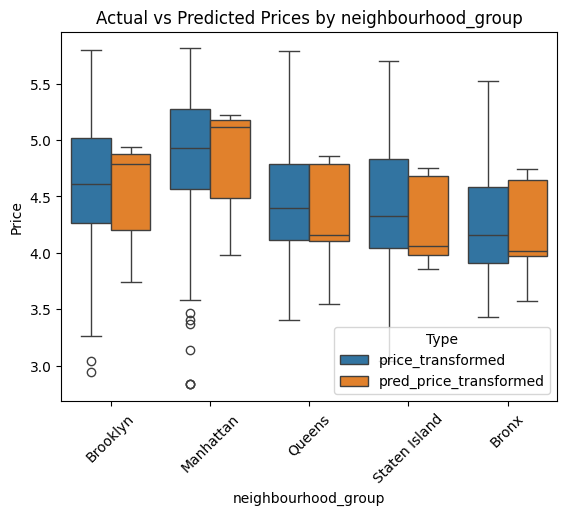

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 neighbourhoods
top_n = test_x['neighbourhood_group'].value_counts().nlargest(10).index
filtered_data = test_x[test_x['neighbourhood_group'].isin(top_n)]

# Melt the dataframe to have 'Actual' and 'Predicted' in one column for easier plotting
melted_data = filtered_data.melt(
    id_vars=['neighbourhood_group'],
    value_vars=['price_transformed', 'pred_price_transformed'],
    var_name='Type', value_name='Price'
)

# Create boxplot
sns.boxplot(data=melted_data, x='neighbourhood_group', y='Price', hue='Type')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted Prices by neighbourhood_group')
plt.show()


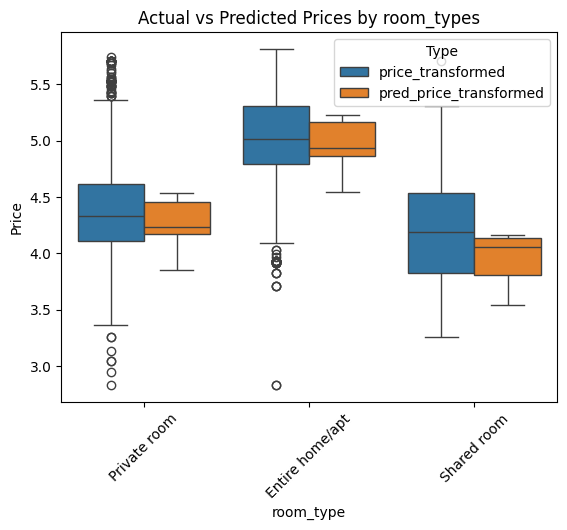

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 neighbourhoods
top_n = test_x['room_type'].value_counts().nlargest(10).index
filtered_data = test_x[test_x['room_type'].isin(top_n)]

# Melt the dataframe to have 'Actual' and 'Predicted' in one column for easier plotting
melted_data = filtered_data.melt(
    id_vars=['room_type'],
    value_vars=['price_transformed', 'pred_price_transformed'],
    var_name='Type', value_name='Price'
)

# Create boxplot
sns.boxplot(data=melted_data, x='room_type', y='Price', hue='Type')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted Prices by room_types')
plt.show()


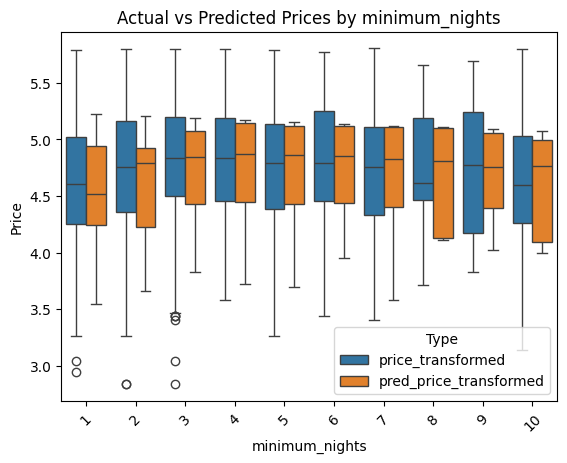

In [507]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 neighbourhoods
top_n = test_x['minimum_nights'].value_counts().nlargest(10).index
filtered_data = test_x[test_x['minimum_nights'].isin(top_n)]

# Melt the dataframe to have 'Actual' and 'Predicted' in one column for easier plotting
melted_data = filtered_data.melt(
    id_vars=['minimum_nights'],
    value_vars=['price_transformed', 'pred_price_transformed'],
    var_name='Type', value_name='Price'
)

# Create boxplot
sns.boxplot(data=melted_data, x='minimum_nights', y='Price', hue='Type')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted Prices by minimum_nights')
plt.show()


In [508]:
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score

r2=r2_score(test_x['price_transformed'],test_x['pred_price_transformed'])
rmse=root_mean_squared_error(test_x['price_transformed'],test_x['pred_price_transformed'])
mse=mean_squared_error(test_x['price_transformed'],test_x['pred_price_transformed'])

print('r2:',r2)
print('rmse:',rmse)
print('mse:',mse)

r2: 0.4541940235644163
rmse: 0.3837311256313559
mse: 0.14724957677830747


In [509]:
test_x.head(4)

host_id    host_name neighbourhood_group neighbourhood  latitude  \
0     2787         John            Brooklyn    Kensington  40.64749   
1     2845     Jennifer           Manhattan       Midtown  40.75362   
2     4632    Elisabeth           Manhattan        Harlem  40.80902   
3     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19               0.21                               6   
1  2019-05-21               0.38                               2   
2         NaN                NaN                               1   
3  2019-07-05               4.64                               1   

   availability_365 availability_cat      review_bin review_bin_mid  \
0               365         All Year     (0.0, 10.0]            5.0   
1               355         Seasonal    (40.0, 50.0]           45.0   
2               365         All Year             NaN            NaN   
3               194         Seasonal  (260.0, 270.0]          265.0   

   price_transformed  pred_price_transformed  
0           5.010635                4.240962  
1           5.420535                5.198410  
2           5.017280                4.496664  
3           4.499810                4.788318

In [510]:
# random forest regressor


from sklearn.ensemble import RandomForestRegressor

In [511]:
model=RandomForestRegressor(n_estimators=100,max_depth=10)

In [512]:
train_x.head()

host_id host_name neighbourhood_group       neighbourhood  latitude  \
9827  39636434     Peter            Brooklyn            Bushwick  40.69095   
9830  39639929      John               Bronx           Concourse  40.82381   
9831  10095503    Sophia           Manhattan              Harlem  40.82112   
9832   1348134   Mareike            Brooklyn       Crown Heights  40.67552   
9833  39639169   Marlene            Brooklyn  Bedford-Stuyvesant  40.68338   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
9827  -73.92386     Private room     48               4                  8   
9830  -73.92725  Entire home/apt    110               1                  1   
9831  -73.94962  Entire home/apt    150               1                  7   
9832  -73.96041  Entire home/apt    120               5                  4   
9833  -73.92072  Entire home/apt    110               3                125   

     last_review  reviews_per_month  calculated_host_listings_count  \
9827  2017-08-30               0.17                               1   
9830  2015-08-08               0.02                               1   
9831  2016-10-30               0.15                               1   
9832  2018-12-31               0.09                               1   
9833  2019-06-25               2.66                               1   

      availability_365 availability_cat  review_bin review_bin_mid  \
9827                 0    Not Available     (0, 10]            5.0   
9830                 0    Not Available     (0, 10]            5.0   
9831                10           Rarely     (0, 10]            5.0   
9832                10           Rarely     (0, 10]            5.0   
9833               315         Seasonal  (120, 130]          125.0   

      price_transformed  
9827           3.891820  
9830           4.709530  
9831           5.017280  
9832           4.795791  
9833           4.709530

In [513]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31783 entries, 9827 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         31783 non-null  int64   
 1   host_name                       31772 non-null  object  
 2   neighbourhood_group             31783 non-null  object  
 3   neighbourhood                   31783 non-null  object  
 4   latitude                        31783 non-null  float64 
 5   longitude                       31783 non-null  float64 
 6   room_type                       31783 non-null  object  
 7   price                           31783 non-null  int64   
 8   minimum_nights                  31783 non-null  int64   
 9   number_of_reviews               31783 non-null  int64   
 10  last_review                     26062 non-null  object  
 11  reviews_per_month               26062 non-null  float64 
 12  calculated_host_list

In [514]:
train_x.drop(['review_bin','review_bin_mid'],axis=1,inplace=True)
test_x.drop(['review_bin','review_bin_mid'],axis=1,inplace=True)

/tmp/ipython-input-1173710391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.drop(['review_bin','review_bin_mid'],axis=1,inplace=True)
/tmp/ipython-input-1173710391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.drop(['review_bin','review_bin_mid'],axis=1,inplace=True)


In [515]:
train_x

host_id      host_name neighbourhood_group       neighbourhood  \
9827   39636434          Peter            Brooklyn            Bushwick   
9830   39639929           John               Bronx           Concourse   
9831   10095503         Sophia           Manhattan              Harlem   
9832    1348134        Mareike            Brooklyn       Crown Heights   
9833   39639169        Marlene            Brooklyn  Bedford-Stuyvesant   
...         ...            ...                 ...                 ...   
48890   8232441        Sabrina            Brooklyn  Bedford-Stuyvesant   
48891   6570630        Marisol            Brooklyn            Bushwick   
48892  23492952  Ilgar & Aysel           Manhattan              Harlem   
48893  30985759            Taz           Manhattan      Hell's Kitchen   
48894  68119814     Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
9827   40.69095  -73.92386     Private room     48               4   
9830   40.82381  -73.92725  Entire home/apt    110               1   
9831   40.82112  -73.94962  Entire home/apt    150               1   
9832   40.67552  -73.96041  Entire home/apt    120               5   
9833   40.68338  -73.92072  Entire home/apt    110               3   
...         ...        ...              ...    ...             ...   
48890  40.67853  -73.94995     Private room     70               2   
48891  40.70184  -73.93317     Private room     40               4   
48892  40.81475  -73.94867  Entire home/apt    115              10   
48893  40.75751  -73.99112      Shared room     55               1   
48894  40.76404  -73.98933     Private room     90               7   

       number_of_reviews last_review  reviews_per_month  \
9827                   8  2017-08-30               0.17   
9830                   1  2015-08-08               0.02   
9831                   7  2016-10-30               0.15   
9832                   4  2018-12-31               0.09   
9833                 125  2019-06-25               2.66   
...                  ...         ...                ...   
48890                  0         NaN                NaN   
48891                  0         NaN                NaN   
48892                  0         NaN                NaN   
48893                  0         NaN                NaN   
48894                  0         NaN                NaN   

       calculated_host_listings_count  availability_365 availability_cat  \
9827                                1                 0    Not Available   
9830                                1                 0    Not Available   
9831                                1                10           Rarely   
9832                                1                10           Rarely   
9833                                1               315         Seasonal   
...                               ...               ...              ...   
48890                               2                 9           Rarely   
48891                               2                36           Rarely   
48892                               1                27           Rarely   
48893                               6                 2           Rarely   
48894                               1                23           Rarely   

       price_transformed  
9827            3.891820  
9830            4.709530  
9831            5.017280  
9832            4.795791  
9833            4.709530  
...                  ...  
48890           4.262680  
48891           3.713572  
48892           4.753590  
48893           4.025352  
48894           4.510860  

[31783 rows x 16 columns]

In [516]:
train_x.drop(['host_id','last_review'],axis=1,inplace=True)
test_x.drop(['host_id','last_review'],axis=1,inplace=True)

/tmp/ipython-input-712884322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x.drop(['host_id','last_review'],axis=1,inplace=True)
/tmp/ipython-input-712884322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.drop(['host_id','last_review'],axis=1,inplace=True)


In [517]:

full_x = pd.concat([train_x, test_x], axis=0).reset_index(drop=True)


In [518]:
full_x

host_name neighbourhood_group       neighbourhood  latitude  \
0               Peter            Brooklyn            Bushwick  40.69095   
1                John               Bronx           Concourse  40.82381   
2              Sophia           Manhattan              Harlem  40.82112   
3             Mareike            Brooklyn       Crown Heights  40.67552   
4             Marlene            Brooklyn  Bedford-Stuyvesant  40.68338   
...               ...                 ...                 ...       ...   
39724           Moran           Manhattan     Upper West Side  40.79400   
39725  Sarah And Mike           Manhattan  Washington Heights  40.83353   
39726            Puja            Brooklyn        Williamsburg  40.70641   
39727           Maura            Brooklyn        Williamsburg  40.71272   
39728        Samantha              Queens             Astoria  40.76254   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.92386     Private room     48               4                  8   
1      -73.92725  Entire home/apt    110               1                  1   
2      -73.94962  Entire home/apt    150               1                  7   
3      -73.96041  Entire home/apt    120               5                  4   
4      -73.92072  Entire home/apt    110               3                125   
...          ...              ...    ...             ...                ...   
39724  -73.97632  Entire home/apt     99               5                 16   
39725  -73.94393     Private room    110               4                 45   
39726  -73.96801  Entire home/apt    185               1                  0   
39727  -73.96632  Entire home/apt    120               1                  0   
39728  -73.91415     Private room     89               2                  7   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.17                               1                 0   
1                   0.02                               1                 0   
2                   0.15                               1                10   
3                   0.09                               1                10   
4                   2.66                               1               315   
...                  ...                             ...               ...   
39724               0.34                               1                 0   
39725               2.23                               1                59   
39726                NaN                               1                 0   
39727                NaN                               1                 0   
39728               0.15                               2                 0   

      availability_cat  price_transformed  pred_price_transformed  
0        Not Available           3.891820                     NaN  
1        Not Available           4.709530                     NaN  
2               Rarely           5.017280                     NaN  
3               Rarely           4.795791                     NaN  
4             Seasonal           4.709530                     NaN  
...                ...                ...                     ...  
39724    Not Available           4.605170                5.147449  
39725           Rarely           4.709530                4.454702  
39726    Not Available           5.225747                4.939319  
39727    Not Available           4.795791                4.939319  
39728    Not Available           4.499810                4.146350  

[39729 rows x 15 columns]

In [519]:
from sklearn.preprocessing import LabelEncoder
encoders = {}

cat_cols = train_x.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    full_x[col] = le.fit_transform(full_x[col])

    encoders[col] = le


In [520]:
full_x.head()

host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
0       7495                    1             28  40.69095  -73.92386   
1       4526                    0             47  40.82381  -73.92725   
2       8842                    2             93  40.82112  -73.94962   
3       6042                    1             51  40.67552  -73.96041   
4       6164                    1             13  40.68338  -73.92072   

   room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
0          1     48               4                  8               0.17   
1          0    110               1                  1               0.02   
2          0    150               1                  7               0.15   
3          0    120               5                  4               0.09   
4          0    110               3                125               2.66   

   calculated_host_listings_count  availability_365  availability_cat  \
0                               1                 0                 1   
1                               1                 0                 1   
2                               1                10                 2   
3                               1                10                 2   
4                               1               315                 3   

   price_transformed  pred_price_transformed  
0           3.891820                     NaN  
1           4.709530                     NaN  
2           5.017280                     NaN  
3           4.795791                     NaN  
4           4.709530                     NaN

In [521]:
full_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39729 entries, 0 to 39728
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       39729 non-null  int64  
 1   neighbourhood_group             39729 non-null  int64  
 2   neighbourhood                   39729 non-null  int64  
 3   latitude                        39729 non-null  float64
 4   longitude                       39729 non-null  float64
 5   room_type                       39729 non-null  int64  
 6   price                           39729 non-null  int64  
 7   minimum_nights                  39729 non-null  int64  
 8   number_of_reviews               39729 non-null  int64  
 9   reviews_per_month               33029 non-null  float64
 10  calculated_host_listings_count  39729 non-null  int64  
 11  availability_365                39729 non-null  int64  
 12  availability_cat                

In [522]:
x,y=full_x.drop(['price','price_transformed','host_name','neighbourhood','pred_price_transformed'],axis=1),full_x['price_transformed']

In [523]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.2)

In [524]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31783 entries, 20290 to 15795
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             31783 non-null  int64  
 1   latitude                        31783 non-null  float64
 2   longitude                       31783 non-null  float64
 3   room_type                       31783 non-null  int64  
 4   minimum_nights                  31783 non-null  int64  
 5   number_of_reviews               31783 non-null  int64  
 6   reviews_per_month               26385 non-null  float64
 7   calculated_host_listings_count  31783 non-null  int64  
 8   availability_365                31783 non-null  int64  
 9   availability_cat                31783 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 2.7 MB


In [525]:
model.fit(train_x,train_y)

RandomForestRegressor(max_depth=10)

In [526]:
test_x

neighbourhood_group  latitude  longitude  room_type  minimum_nights  \
3628                     3  40.76636  -73.90393          0               1   
18453                    3  40.75539  -73.83203          1               1   
4800                     2  40.71941  -73.99706          1               5   
19248                    1  40.68500  -73.99966          0               2   
31381                    2  40.85044  -73.93042          1               1   
...                    ...       ...        ...        ...             ...   
13364                    1  40.72546  -73.95558          1               1   
27854                    3  40.75839  -73.91191          1               1   
26521                    2  40.80761  -73.94305          1               2   
31369                    1  40.69286  -73.94195          0               2   
7317                     3  40.69621  -73.84532          1               2   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
3628                   0                NaN                               1   
18453                 20               1.64                               4   
4800                  26               0.67                               2   
19248                 11               0.91                               1   
31381                  0                NaN                               1   
...                  ...                ...                             ...   
13364                 62               2.80                               2   
27854                  9               3.14                               2   
26521                  0                NaN                               1   
31369                  0                NaN                               1   
7317                   8               0.23                               2   

       availability_365  availability_cat  
3628                  0                 1  
18453                 2                 2  
4800                160                 2  
19248                 0                 1  
31381                38                 2  
...                 ...               ...  
13364               359                 3  
27854               341                 3  
26521                 6                 2  
31369                17                 2  
7317                337                 3  

[7946 rows x 10 columns]

In [527]:
pred=model.predict(test_x)

In [528]:
r2_score(test_y,pred)

0.6055810981250078

In [529]:
mean_squared_error(test_y,pred)

0.12515062543417815

In [530]:
root_mean_squared_error(test_y,pred)

0.35376634299234594

In [531]:
importances = model.feature_importances_

# Combine with feature names
feature_importance_df = pd.DataFrame({
    'Feature': train_x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top predictors
print(feature_importance_df)

                          Feature  Importance
3                       room_type    0.616623
2                       longitude    0.151844
1                        latitude    0.118053
8                availability_365    0.045817
6               reviews_per_month    0.027105
5               number_of_reviews    0.014018
4                  minimum_nights    0.011595
7  calculated_host_listings_count    0.011564
0             neighbourhood_group    0.002419
9                availability_cat    0.000961


# feature selection

In [532]:
selected_x=x[['latitude','longitude','room_type']]
selected_y=y

In [533]:
train_x_selected,test_x_selected,train_y_selected,test_y_selected=train_test_split(selected_x,selected_y,test_size=0.2,random_state=42)

In [534]:
model.fit(train_x_selected,train_y_selected)

RandomForestRegressor(max_depth=10)

In [535]:
predicts=model.predict(test_x_selected)

In [536]:
r2_score(test_y_selected,predicts)

0.5690936180191482

In [537]:
mean_squared_error(test_y_selected,predicts)

0.13672824236393868

In [538]:
root_mean_squared_error(test_y_selected,predicts)

0.36976782223976534

In [539]:
import pandas as pd

# Combine data into one DataFrame for plotting
plot_df = pd.DataFrame({
    'room_type': test_x_selected['room_type'],
    'actual_price': test_y_selected,
    'predicted_price': predicts
})


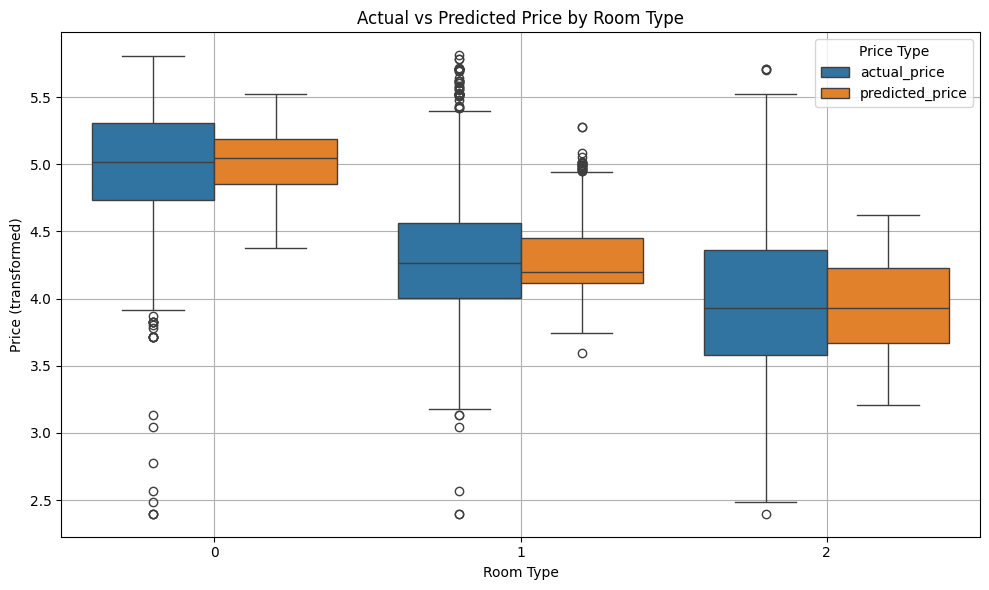

In [540]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
melted = pd.melt(plot_df, id_vars='room_type',
                 value_vars=['actual_price', 'predicted_price'],
                 var_name='Price_Type',
                 value_name='Price')

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='Price', hue='Price_Type', data=melted)

plt.title('Actual vs Predicted Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (transformed)')
plt.grid(True)
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()
